In [1]:
import pandas as pd
!pip install pycoingecko 

In [2]:
from pycoingecko import CoinGeckoAPI

cg = CoinGeckoAPI()

In [3]:
bitcon_data = cg.get_coin_market_chart_by_id(id ='bitcoin', vs_currency ='usd', days =30)

#select the needed column
bd = bitcon_data['prices']

In [4]:
#convert the dictionary to data frame
bd1 = pd.DataFrame(bd, columns = ['Timestamp', 'prices'])

In [5]:
bd1['date_time'] = pd.to_datetime(bd1['Timestamp'], unit = 'ms')

bd2 = bd1[['date_time', 'prices']]

bd2.head(10)

,date_time,prices
0,2023-08-08 13:00:15.632,29473.164036
1,2023-08-08 14:00:05.609,29334.489463
2,2023-08-08 15:00:55.793,29427.306594
3,2023-08-08 16:00:53.259,29513.168098
4,2023-08-08 17:00:23.848,29732.199220
5,2023-08-08 18:01:00.829,29758.985448
6,2023-08-08 19:00:49.266,29809.599388
7,2023-08-08 20:00:20.445,29842.807149
8,2023-08-08 21:01:00.650,29976.211986
9,2023-08-08 22:00:14.141,29848.205878


In [6]:
#candlestick chart

candlestick_chart = bd2.groupby(bd2.date_time.dt.date).agg({'prices': ['min', 'max', 'first', 'last']})

candlestick_chart

prices                                          
                     min           max         first          last
date_time                                                         
2023-08-08  29334.489463  29976.211986  29473.164036  29744.858278
2023-08-09  29457.985322  30001.634377  29779.561671  29550.695469
2023-08-10  29399.675135  29618.512675  29585.488077  29445.981092
2023-08-11  29308.311527  29467.005272  29423.818916  29417.472422
2023-08-12  29365.862258  29443.689754  29396.847971  29409.321256
2023-08-13  29289.373912  29437.750173  29414.278682  29289.373912
2023-08-14  29212.175016  29652.921215  29284.969714  29424.760257
2023-08-15  29144.072559  29400.586804  29400.586804  29156.079386
2023-08-16  28898.886143  29204.492957  29164.115146  28898.886143
2023-08-17  26226.262691  28704.201699  28704.201699  26519.482128
2023-08-18  26023.767244  26668.805540  26646.454476  26065.719310
2023-08-19  25847.295855  26151.759853  26047.852265  26048.878766
2023-08-20  26031.129626  26219.852157  26104.778631  26219.852157
2023-08-21  25929.420521  26206.036112  26160.700420  26139.901849
2023-08-22  25670.789710  26119.005959  26119.005959  25798.381381
2023-08-23  25872.696876  26641.120068  26033.675407  26442.264848
2023-08-24  25999.028648  26507.185074  26425.544590  26099.954008
2023-08-25  25836.021433  26141.325678  26137.987984  26037.451965
2023-08-26  26002.510401  26078.307413  26044.036209  26015.129877
2023-08-27  25986.933630  26145.137005  26002.015717  26075.023492
2023-08-28  25906.617276  26138.837728  26082.717178  26023.061811
2023-08-29  25960.814260  27974.418745  26109.693155  27642.983916
2023-08-30  27119.168598  27730.503736  27730.503736  27250.840454
2023-08-31  25991.006155  27357.399886  27303.353483  26011.404736
2023-09-01  25461.332423  26079.223081  25927.417006  25789.789843
2023-09-02  25764.435339  25898.432073  25812.330494  25859.364286
2023-09-03  25836.905638  26054.793419  25853.656843  25948.197964
2023-09-04  25659.620573  25998.296230  25959.596311  25749.106735
2023-09-05  25652.307316  25829.364773  25829.364773  25753.959299
2023-09-06  25576.564269  25835.942669  25770.129055  25725.087828
2023-09-07  25674.250014  25822.847799  25752.958419  25674.250014

In [7]:
#Rename columns

candlestick_chart.columns = ['Low', 'High', 'Open', 'Close']

candlestick_chart

,Low,High,Open,Close
date_time,,,,
2023-08-08,29334.489463,29976.211986,29473.164036,29744.858278
2023-08-09,29457.985322,30001.634377,29779.561671,29550.695469
2023-08-10,29399.675135,29618.512675,29585.488077,29445.981092
2023-08-11,29308.311527,29467.005272,29423.818916,29417.472422
2023-08-12,29365.862258,29443.689754,29396.847971,29409.321256
2023-08-13,29289.373912,29437.750173,29414.278682,29289.373912
2023-08-14,29212.175016,29652.921215,29284.969714,29424.760257
2023-08-15,29144.072559,29400.586804,29400.586804,29156.079386
2023-08-16,28898.886143,29204.492957,29164.115146,28898.886143


In [8]:
#CANDLE STICK CHART
!pip install matplotlib mplfinance

import mplfinance as mpf



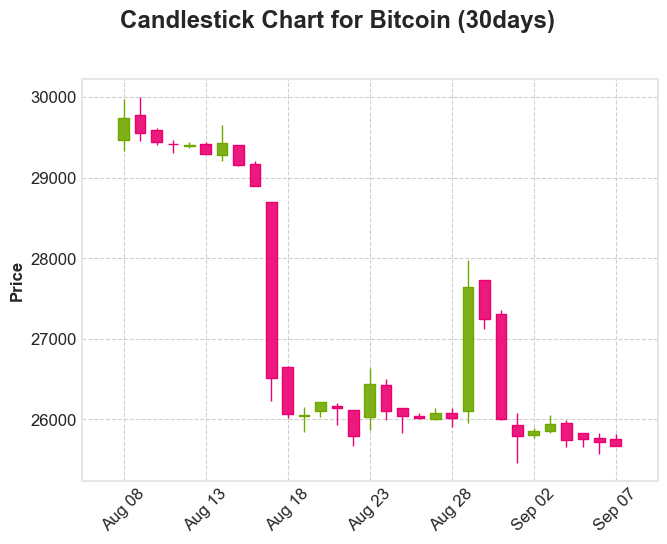

,Low,High,Open,Close
date_time,,,,
2023-08-08,29334.489463,29976.211986,29473.164036,29744.858278
2023-08-09,29457.985322,30001.634377,29779.561671,29550.695469
2023-08-10,29399.675135,29618.512675,29585.488077,29445.981092
2023-08-11,29308.311527,29467.005272,29423.818916,29417.472422
2023-08-12,29365.862258,29443.689754,29396.847971,29409.321256
2023-08-13,29289.373912,29437.750173,29414.278682,29289.373912
2023-08-14,29212.175016,29652.921215,29284.969714,29424.760257
2023-08-15,29144.072559,29400.586804,29400.586804,29156.079386
2023-08-16,28898.886143,29204.492957,29164.115146,28898.886143


In [13]:
#candlestick_chart.set_index('date_time', inplace=True)

candlestick_chart.index = pd.to_datetime(candlestick_chart.index)

mpf.plot(candlestick_chart, type='candle', title='Candlestick Chart for Bitcoin (30days)', style='binance')

candlestick_chart

#plt.show()